In [1]:
import numpy as np
import gpflow
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
sns.set_context("talk", font_scale = 1.4)

/Users/nimishawalgaonkar/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
a = 2
b = 2
X = np.linspace(0,1,5)[:,None]
X_prime = np.linspace(0,1,20)[:,None]
Y = scipy.stats.beta.pdf(X, a, b)

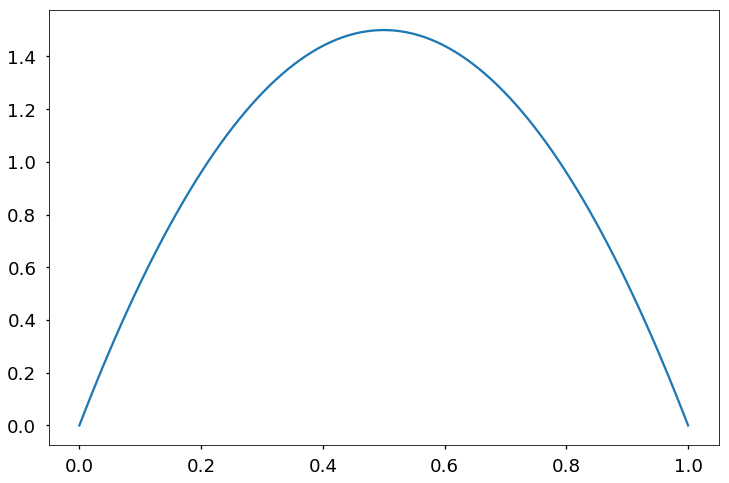

In [3]:
Xplot = np.linspace(0,1,100)[:,None]
Yplot = scipy.stats.beta.pdf(Xplot, a, b)
plt.figure(figsize = (12,8))
plt.plot(Xplot, Yplot)

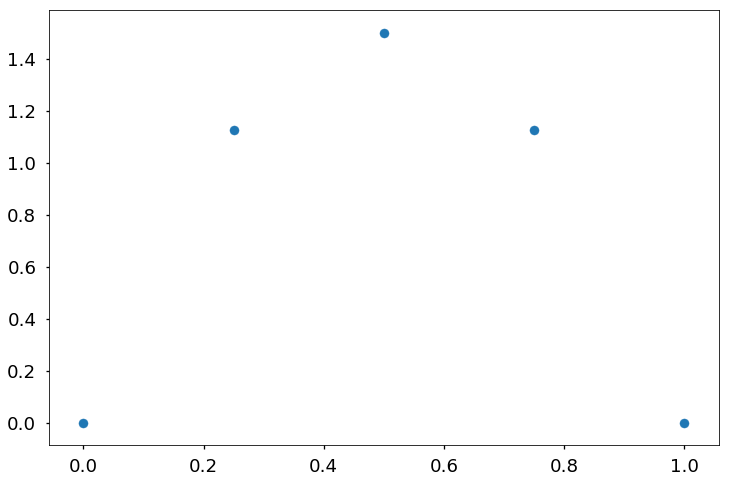

In [4]:
plt.figure(figsize = (12,8))
plt.scatter(X, Y)

In [5]:
import sys
sys.path.append('../')
from GPFlowUnimodal.ker_w_der import ExtendRBF1D
from GPFlowUnimodal.unimodal_gpmc import UnimodalGPMC

In [6]:
m = UnimodalGPMC(X, Y, X_prime)
m.likelihood.noise_variance = 0.01
m.likelihood.noise_variance.fixed = True

In [7]:
m

Name,values,prior,constraint
unimodal_model.Vf,[[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.]],"N([0.],[1.])",(none)
unimodal_model.Vg,[[0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.] [0.]],"N([0.],[1.])",(none)
unimodal_model.kern_f.lengthscale,[1.],None,+ve
unimodal_model.kern_f.signal_variance,[1.],None,+ve
unimodal_model.kern_g.lengthscale,[1.],None,+ve
unimodal_model.kern_g.signal_variance,[1.],None,+ve
unimodal_model.likelihood.noise_variance,[0.01],None,[FIXED]


In [8]:
m.kern_f.lengthscale.prior = gpflow.priors.Gamma(1., 1.)
m.kern_f.signal_variance.prior = gpflow.priors.Gamma(1.,1.)
m.kern_g.lengthscale.prior = gpflow.priors.Gamma(1., 1.)
m.kern_g.signal_variance.prior = gpflow.priors.Gamma(1.,1.)

In [9]:
m.optimize(maxiter=150) # start near MAP

      fun: array([68.0580841])
 hess_inv: <69x69 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.89911163e+00,  1.19658492e+00, -1.40951656e+00, -2.10508422e-01,
        9.87008547e-01,  8.38831793e-04, -2.81970109e-04, -3.09665942e-04,
       -3.91590823e-04, -3.43707481e-04, -2.11422163e-04, -8.04593382e-05,
        3.90392263e-05,  1.42339858e-04,  1.99671771e-04,  1.96779749e-04,
        1.54477929e-04,  1.01610625e-04,  5.75399219e-05,  2.83644756e-05,
        1.10071330e-05,  1.54367836e-06, -1.98313865e-06, -2.10517550e-06,
       -1.21375861e-06,  4.68524223e-01, -4.02557138e-01,  1.16787114e-01,
        2.50577841e-01,  3.02059451e-01,  1.46084122e-01,  1.51188203e-01,
        1.54883791e-01,  1.03793872e-01,  6.57670955e-02,  5.20595877e-02,
        3.92840745e-02,  2.34536111e-02,  1.16892032e-02,  5.96226952e-03,
        3.25164977e-03,  1.51151682e-03,  4.25416301e-04, -3.97051552e-05,
       -1.27324214e-04,  6.75293681e-06,  1.72085309e-06,  1.57967085e-06,


In [10]:
samples = m.sample(1000, Lmax = 20, epsilon = 0.01, thin = 5, burn = 1000, verbose= True)

burn-in sampling started
Iteration:  100 	 Acc Rate:  83.0 %
Iteration:  200 	 Acc Rate:  86.0 %
Iteration:  300 	 Acc Rate:  94.0 %
Iteration:  400 	 Acc Rate:  85.0 %
Iteration:  500 	 Acc Rate:  72.0 %
Iteration:  600 	 Acc Rate:  71.0 %
Iteration:  700 	 Acc Rate:  72.0 %
Iteration:  800 	 Acc Rate:  87.0 %
Iteration:  900 	 Acc Rate:  70.0 %
Iteration:  1000 	 Acc Rate:  66.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  86.0 %
Iteration:  200 	 Acc Rate:  86.0 %
Iteration:  300 	 Acc Rate:  89.0 %
Iteration:  400 	 Acc Rate:  84.0 %
Iteration:  500 	 Acc Rate:  89.0 %
Iteration:  600 	 Acc Rate:  91.0 %
Iteration:  700 	 Acc Rate:  79.0 %
Iteration:  800 	 Acc Rate:  95.0 %
Iteration:  900 	 Acc Rate:  69.0 %
Iteration:  1000 	 Acc Rate:  69.0 %
Iteration:  1100 	 Acc Rate:  72.0 %
Iteration:  1200 	 Acc Rate:  83.0 %
Iteration:  1300 	 Acc Rate:  94.0 %
Iteration:  1400 	 Acc Rate:  93.0 %
Iteration:  1500 	 Acc Rate:  90.0 %
Iteration:  1600 	 Acc Rate:  74.0 %
Iteratio

In [11]:
#plt.figure(figsize=(16, 4))
#plt.plot(samples)

In [12]:
sample_df = m.get_samples_df(samples)
sample_df.head()

,unimodal_model.Vf,unimodal_model.Vg,unimodal_model.kern_f.lengthscale,unimodal_model.kern_f.signal_variance,unimodal_model.kern_g.lengthscale,unimodal_model.kern_g.signal_variance,unimodal_model.likelihood.noise_variance
0,"[[0.031775877559259376], [1.3106240318212188],...","[[1.5032093965202649], [-1.5797143402830065], ...",[0.2069492819538877],[0.8229606566019241],[0.5483416599881709],[1.221319901357034],[0.01]
1,"[[-0.01846617639039264], [1.359792222267096], ...","[[1.1818628055831326], [-1.3421108794792813], ...",[0.21534633331568848],[0.8647461317806094],[0.6007077375776817],[1.052377322864963],[0.01]
2,"[[0.12291099484085573], [1.296798730347406], [...","[[0.9789361733334255], [-1.4904037872469225], ...",[0.21065106551877477],[0.8713297608668634],[0.7372745363443397],[1.057925707958874],[0.01]
3,"[[0.283564668543881], [1.3104248191856933], [1...","[[1.0032136683689186], [-1.7334172777955719], ...",[0.20887339254529855],[0.7121347977090333],[0.6513650973650378],[1.1024637477107941],[0.01]
4,"[[0.018088018811109177], [1.3106367544510868],...","[[1.0970883677596648], [-1.7413022569913683], ...",[0.22765416179561226],[0.6541750342244853],[0.6623013137884456],[1.147935034088563],[0.01]


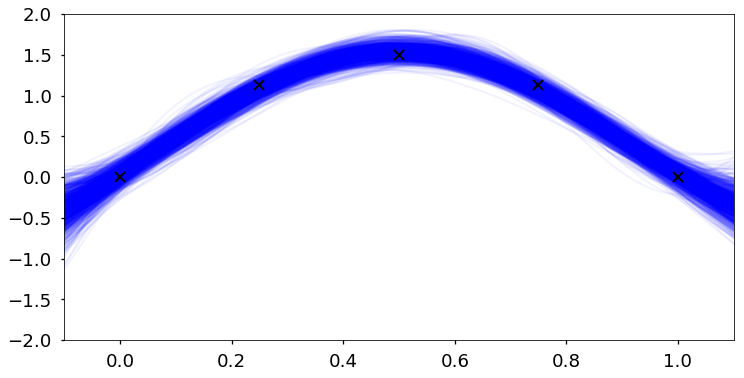

In [16]:
sample_df = m.get_samples_df(samples)
#plot the function posterior
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    f = m.predict_f_samples(xx, 200)
    plt.plot(xx, f[0,:,:], 'b', lw=2, alpha = 0.05)
    
plt.plot(X, Y, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(-2, 2)

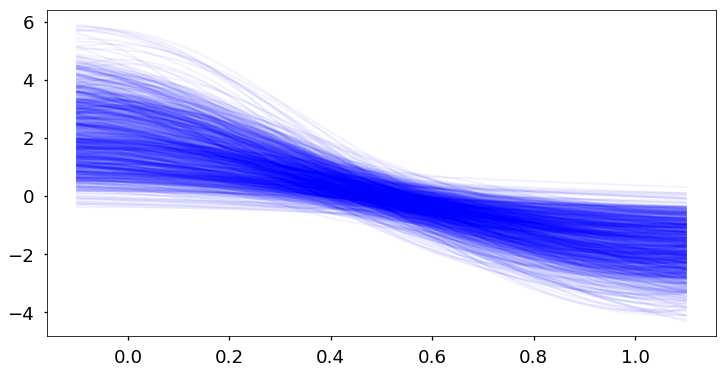

In [15]:
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    g = m.predict_g_samples(xx, 200)
    plt.plot(xx, g[0,:,:], 'b', lw=2, alpha = 0.05)

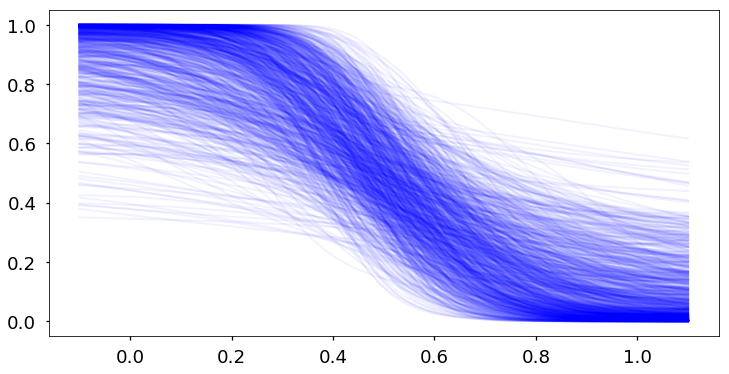

In [17]:
from scipy.stats import norm
#plot the function posterior
xx = np.linspace(-0.1, 1.1, 100)[:,None]
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    g = m.predict_g_samples(xx, 200)
    plt.plot(xx, norm.cdf(g[0,:,:]), 'b', lw=2, alpha = 0.05)